## PARTE 4: ANÁLISIS Y MITIGACIÓN DE SESGO

Sesgo de supervivencia

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
# Cargar el dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Asegurarnos de que la columna de supervivencia se llame 'Survived'
if "Survived" not in df.columns:
    raise ValueError("No se encontró la columna 'Survived' en el dataset.")

# Calcular el porcentaje de valores nulos por grupo (0 = No sobrevivió, 1 = Sobrevivió)
missing_by_survival = (
    df.groupby("Survived")
      .apply(lambda x: x.isnull().mean() * 100)
      .round(2)  # redondeamos a 2 decimales
      .T         # transponemos para que las columnas sean Survived
)

# Renombramos las columnas para mejor lectura
missing_by_survival.columns = ["No sobrevivió (0)", "Sobrevivió (1)"]

print("\nPorcentaje de valores faltantes según supervivencia:\n")
print(missing_by_survival)



Porcentaje de valores faltantes según supervivencia:

             No sobrevivió (0)  Sobrevivió (1)
PassengerId               0.00            0.00
Survived                  0.00            0.00
Pclass                    0.00            0.00
Name                      0.00            0.00
Sex                       0.00            0.00
Age                      22.77           15.20
SibSp                     0.00            0.00
Parch                     0.00            0.00
Ticket                    0.00            0.00
Fare                      0.00            0.00
Cabin                    87.61           60.23
Embarked                  0.00            0.58


/tmp/ipython-input-795806570.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean() * 100)


Sesgo de clase social

In [ ]:

# Asegurarnos de que la columna de clase se llame 'Pclass'
if "Pclass" not in df.columns:
    raise ValueError("No se encontró la columna 'Pclass' en el dataset.")

# Calcular porcentaje de valores nulos por clase social
missing_by_class = (
    df.groupby("Pclass")
      .apply(lambda x: x.isnull().mean() * 100)
      .round(2)  # redondeamos
      .T         # transponemos para mejor lectura
)

# Renombramos columnas
missing_by_class.columns = [f"Clase {c}" for c in missing_by_class.columns]

print("\nPorcentaje de valores faltantes según clase social (Pclass):\n")
print(missing_by_class)


Porcentaje de valores faltantes según clase social (Pclass):

             Clase 1  Clase 2  Clase 3
PassengerId     0.00     0.00     0.00
Survived        0.00     0.00     0.00
Pclass          0.00     0.00     0.00
Name            0.00     0.00     0.00
Sex             0.00     0.00     0.00
Age            13.89     5.98    27.70
SibSp           0.00     0.00     0.00
Parch           0.00     0.00     0.00
Ticket          0.00     0.00     0.00
Fare            0.00     0.00     0.00
Cabin          18.52    91.30    97.56
Embarked        0.93     0.00     0.00


/tmp/ipython-input-1890928856.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean() * 100)


Sesgo de género

In [ ]:


gender_col = "Sex"


# Calcular porcentaje de valores nulos por género
missing_by_gender = (
    df.groupby(gender_col)
      .apply(lambda x: x.isnull().mean() * 100)
      .round(2)
      .T
)

# Renombramos columnas
missing_by_gender.columns = [f"Género: {c}" for c in missing_by_gender.columns]

print("\nPorcentaje de valores faltantes según género:\n")
print(missing_by_gender)


Porcentaje de valores faltantes según género:

             Género: female  Género: male
PassengerId            0.00          0.00
Survived               0.00          0.00
Pclass                 0.00          0.00
Name                   0.00          0.00
Sex                    0.00          0.00
Age                   16.88         21.49
SibSp                  0.00          0.00
Parch                  0.00          0.00
Ticket                 0.00          0.00
Fare                   0.00          0.00
Cabin                 69.11         81.46
Embarked               0.64          0.00


/tmp/ipython-input-929681850.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean() * 100)


Sesgo histórico

/tmp/ipython-input-146582703.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex_code'] = df['Sex'].replace({
/tmp/ipython-input-146582703.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje.index, y=porcentaje.values, palette=['skyblue', 'pink'])


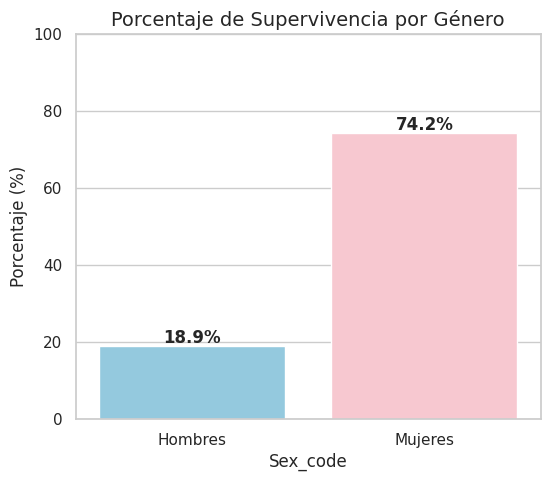

/tmp/ipython-input-146582703.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sex", palette="Set2")


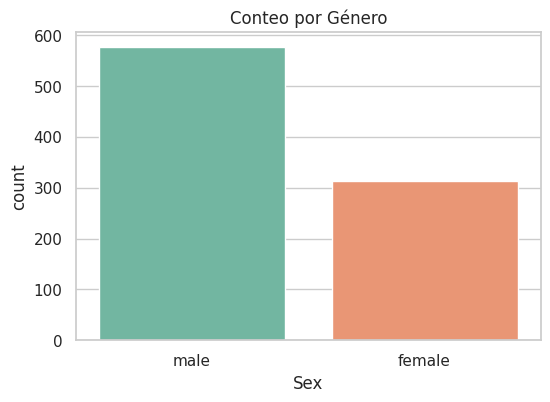

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Codificar género a enteros
df['Sex_code'] = df['Sex'].replace({
    'female': 1,
    'male': 0
})

# Calcular porcentaje de supervivencia por género
porcentaje = (
    df.groupby('Sex_code')['Survived']
    .mean() * 100
)

# Mapeo de códigos a texto
porcentaje.index = porcentaje.index.map({0: 'Hombres', 1: 'Mujeres'})

# Crear gráfica
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=porcentaje.index, y=porcentaje.values, palette=['skyblue', 'pink'])

# Añadir etiquetas de porcentaje encima de cada barra
for i, val in enumerate(porcentaje.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Género', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)

plt.show()

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex", palette="Set2")
plt.title("Conteo por Género")
plt.show()


/tmp/ipython-input-1151852693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_pclass.index, y=porcentaje_pclass.values, palette='coolwarm')


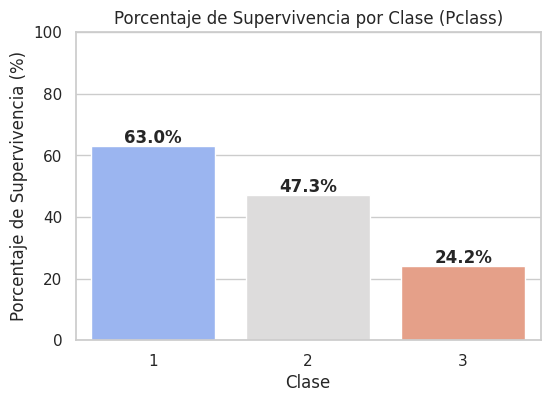

/tmp/ipython-input-1151852693.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Count')
/tmp/ipython-input-1151852693.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


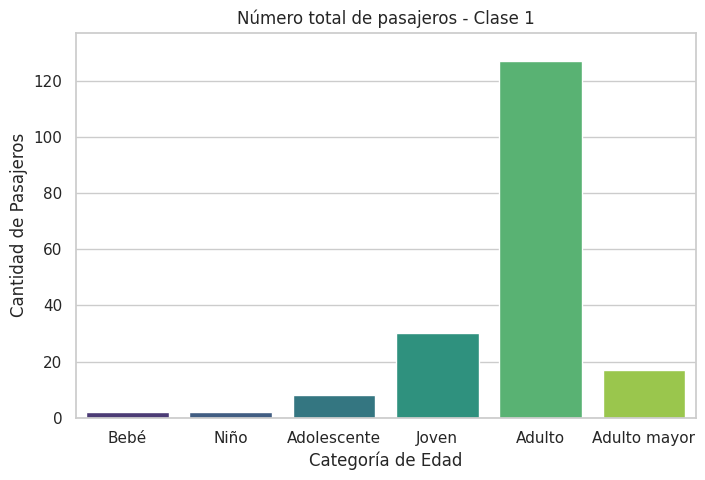

/tmp/ipython-input-1151852693.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


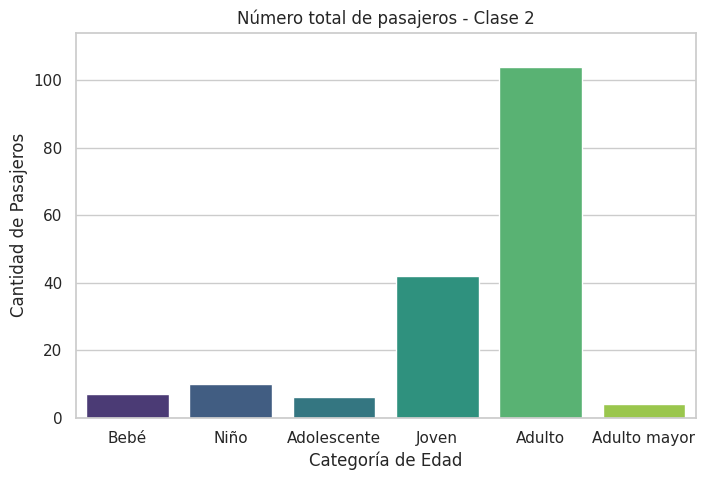

/tmp/ipython-input-1151852693.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")


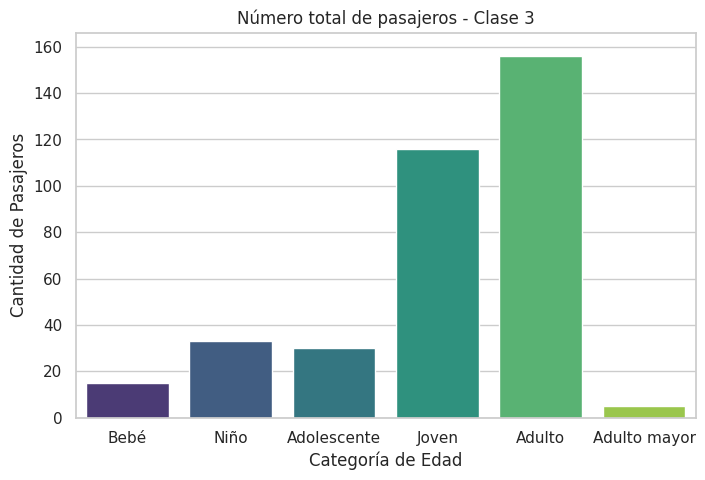

In [ ]:

# Calcular porcentaje de supervivencia por Pclass
porcentaje_pclass = (df.groupby('Pclass')['Survived'].mean() * 100).sort_index()

# Crear gráfica
plt.figure(figsize=(6,4))
ax = sns.barplot(x=porcentaje_pclass.index, y=porcentaje_pclass.values, palette='coolwarm')

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_pclass.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Porcentaje de Supervivencia por Clase (Pclass)')
plt.xlabel('Clase')
plt.ylabel('Porcentaje de Supervivencia (%)')
plt.ylim(0, 100)

plt.show()
# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Edad_categoria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Contar pasajeros por clase y categoría de edad
conteo_total = df.groupby(['Pclass', 'Edad_categoria']).size().reset_index(name='Count')

# Configuración de seaborn
sns.set(style="whitegrid")

# Generar gráficas separadas por clase
for clase in sorted(conteo_total['Pclass'].unique()):
    tabla_clase = conteo_total[conteo_total['Pclass']==clase]

    plt.figure(figsize=(8,5))
    sns.barplot(x='Edad_categoria', y='Count', data=tabla_clase, palette="viridis")

    plt.title(f"Número total de pasajeros - Clase {clase}")
    plt.xlabel("Categoría de Edad")
    plt.ylabel("Cantidad de Pasajeros")
    plt.ylim(0, tabla_clase['Count'].max() + 10)

    plt.show()


/tmp/ipython-input-1654853567.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentaje_grupo = df.groupby("GrupoEdad")["Survived"].mean() * 100
/tmp/ipython-input-1654853567.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_grupo.index, y=porcentaje_grupo.values, palette="Spectral")


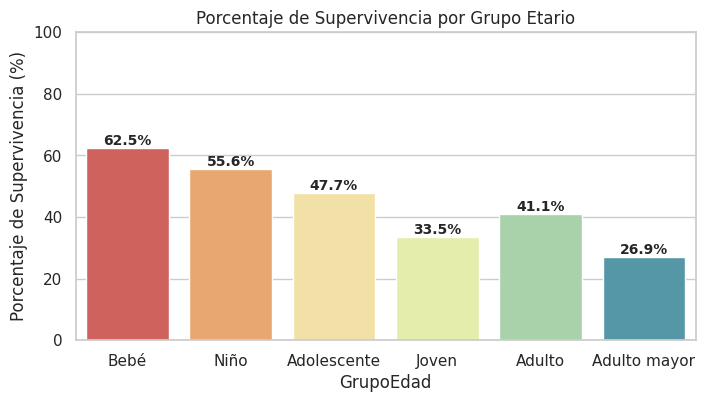

/tmp/ipython-input-1654853567.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Edad_categoria', y='Count', data=conteo_edad, palette="viridis")


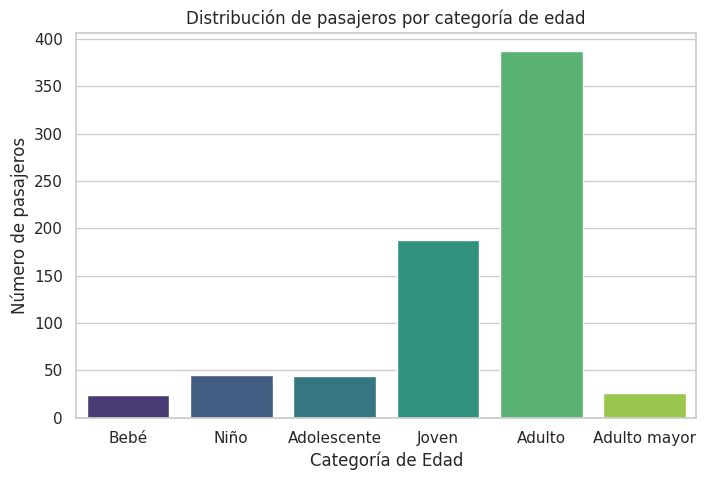

In [ ]:

# Crear grupos etarios
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df["GrupoEdad"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Calcular porcentaje de supervivencia por grupo etario
porcentaje_grupo = df.groupby("GrupoEdad")["Survived"].mean() * 100

# Crear gráfica
plt.figure(figsize=(8,4))
ax = sns.barplot(x=porcentaje_grupo.index, y=porcentaje_grupo.values, palette="Spectral")

# Añadir porcentaje encima de cada barra
for i, val in enumerate(porcentaje_grupo.values):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.title("Porcentaje de Supervivencia por Grupo Etario")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.ylim(0, 100)
plt.show()

# Categorizar edades
bins = [0, 2, 12, 17, 25, 59, 120]
labels = ['Bebé', 'Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto mayor']
df['Edad_categoria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Contar pasajeros por categoría de edad
conteo_edad = df['Edad_categoria'].value_counts().sort_index().reset_index()
conteo_edad.columns = ['Edad_categoria', 'Count']

# Configuración de seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

# Gráfico de barras
sns.barplot(x='Edad_categoria', y='Count', data=conteo_edad, palette="viridis")

plt.title("Distribución de pasajeros por categoría de edad")
plt.xlabel("Categoría de Edad")
plt.ylabel("Número de pasajeros")
plt.show()


/tmp/ipython-input-459567252.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Compañía', y='Count', data=conteo_compania, palette="Set2")


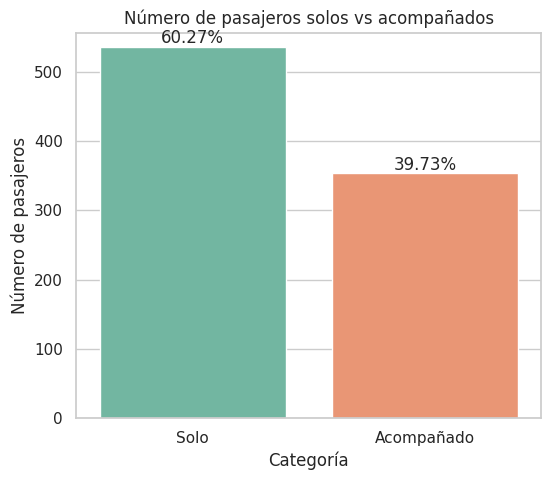

In [ ]:
# Clasificar si el pasajero estaba solo o acompañado
df['Compañía'] = df.apply(lambda row: 'Solo' if row['SibSp'] == 0 and row['Parch'] == 0 else 'Acompañado', axis=1)

# Contar pasajeros por categoría
conteo_compania = df['Compañía'].value_counts().reset_index()
conteo_compania.columns = ['Compañía', 'Count']

# Calcular porcentaje
total = conteo_compania['Count'].sum()
conteo_compania['Porcentaje'] = (conteo_compania['Count'] / total * 100).round(2)

# Configuración de gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(6,5))

# Gráfico de barras
ax = sns.barplot(x='Compañía', y='Count', data=conteo_compania, palette="Set2")

# Agregar porcentaje sobre las barras
for index, row in conteo_compania.iterrows():
    ax.text(index, row['Count'] + 5, f"{row['Porcentaje']}%", ha='center', fontsize=12)

plt.title("Número de pasajeros solos vs acompañados")
plt.xlabel("Categoría")
plt.ylabel("Número de pasajeros")
plt.ylim(0, conteo_compania['Count'].max() + 20)
plt.show()
